In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [54]:
df.shape

(440, 8)

# nentuin jumlah cluster

kan dia ada data kategorical sm data numerik kann, nah caranya gmn yaa kita bisa pake k-medoid atau kita bisa pake k-prototype (gabungan k-modes sama k-means kmodes itu dipake buat anuan kategori, k-means dipake buat anuan numeric)

In [55]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm

100%|██████████| 8/8 [00:36<00:00,  4.58s/it]


Text(0.5, 0, 'n_cluster')

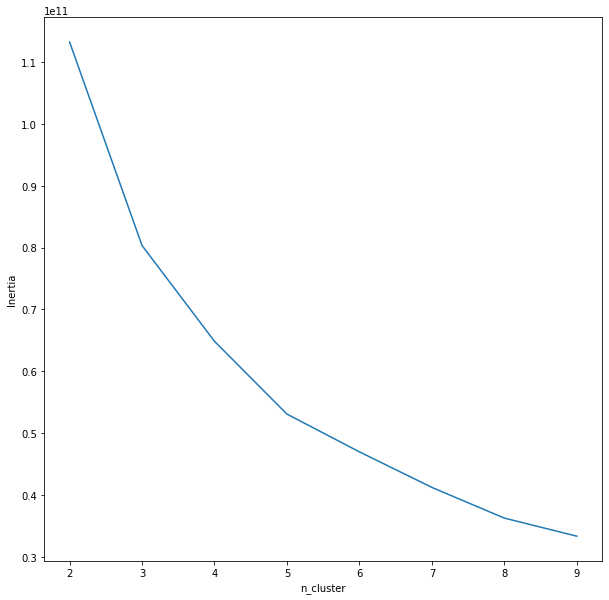

In [56]:
score = []
for n in tqdm (range(2, 10)):
  model = KPrototypes(n_clusters=n)
  model.fit(df, categorical=[0, 1])
  score.append(model.cost_)

plt.figure(figsize=(10, 10))
plt.plot(range(2, 10), score)
plt.ylabel("Inertia")
plt.xlabel("n_cluster")

# train

In [57]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [58]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


# analisa cluster

In [ ]:
cat = model.cluster_centroids_[:,-2:]
# cat = model.cluster_centroids_[0,6]
cat
num = model.cluster_centroids_[:,:-2]
num

array([[ 8000.04      , 18511.42      , 27573.9       ,  1996.68      ,
        12407.36      ,  2252.02      ],
       [ 8298.79758308,  3817.19335347,  5269.56797583,  2567.85498489,
         1768.99697885,  1136.03927492],
       [36156.38983051,  6123.6440678 ,  6366.77966102,  6811.11864407,
         1050.01694915,  3090.05084746]])

In [ ]:
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,8000.040000,18511.420000,27573.900000,1996.680000,12407.360000,2252.020000
1,1.0,3.0,8298.797583,3817.193353,5269.567976,2567.854985,1768.996979,1136.039275
2,1.0,3.0,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847


- 0 = org yg belinya itu susu, grocery, sm detergent
- 1 = org hemat
- 2 = org beli fresh food

In [ ]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

# popular convetional approach
selain pake ml, ada cara lain buat ngauin customer segmentation. caranya itu pake rfm
- recency = seberapa recent transaksinya
- frequency = seberapa sering transaksinya
- monetary = seberapa gede transaksinya <br/>
nah nanti bikin jadi 3 kolom trus itung deh quartilnya


### katanya wira itu k-means itu kurang realable, mending pake dbscan atau algo lain <br/> kalo datanya gak bisa dipisahin secara linier udh kaco nih model